In [41]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [42]:
df = pd.read_csv('Resources/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [43]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [45]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [46]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

**Target Value**  
- Exited  

**Values to be Removed**  
- Remove index rows: `RowNumber` and `CustomerId`  
- Remove `Surname`  

**Numerical X Values**  
- Credit Score  
- Age  
- Tenure  
- Balance  
- NumOfProducts  
- HasCrCard  
- IsActiveMember  
- EstimatedSalary  
- Complain  
- Satisfaction Score  
- Points Earned  

**Encoded X Variables**  
- Geography  
- Gender  

**Ordinal X**  
- Card Type

In [47]:
encoder = OneHotEncoder(sparse_output=False)
ordinal_encoder = OrdinalEncoder(categories=['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND'])

In [48]:
categorical_columns = ['Geography', 'Gender']
ordinal_columns = ['Card Type']

In [49]:
encoded_columns = encoder.fit_transform(df[categorical_columns])
#Create a DataFrame with the encoded columns

one_hot_df = pd.DataFrame(encoded_columns, 
                          columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)
df_encoded.head()


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,1,1,2,DIAMOND,464,1.0,0.0,0.0,1.0,0.0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,0,1,3,DIAMOND,456,0.0,0.0,1.0,1.0,0.0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,1,1,3,DIAMOND,377,1.0,0.0,0.0,1.0,0.0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,0,0,5,GOLD,350,1.0,0.0,0.0,1.0,0.0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,0,0,5,GOLD,425,0.0,0.0,1.0,1.0,0.0


In [50]:
ordinal_encoder = OrdinalEncoder(categories=[['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']])
ordinal_column = ordinal_encoder.fit_transform(df[['Card Type']])
ordinal_df = pd.DataFrame(ordinal_column, 
                          columns=ordinal_encoder.get_feature_names_out(['Card Type']))

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df_encoded.drop(['Card Type'], axis=1), ordinal_df], axis=1)
df_encoded.head()


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,1,1,2,464,1.0,0.0,0.0,1.0,0.0,3.0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,0,1,3,456,0.0,0.0,1.0,1.0,0.0,3.0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,1,1,3,377,1.0,0.0,0.0,1.0,0.0,3.0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,0,0,5,350,1.0,0.0,0.0,1.0,0.0,1.0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,0,0,5,425,0.0,0.0,1.0,1.0,0.0,1.0


In [51]:
correlation = df_encoded.drop(columns='Surname').corr()['Exited']
display(correlation.sort_values(ascending=False))

Exited                1.000000
Complain              0.995693
Age                   0.285296
Geography_Germany     0.173313
Balance               0.118577
Gender_Female         0.106267
Card Type             0.016949
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
CustomerId           -0.006203
HasCrCard            -0.006976
Tenure               -0.013656
RowNumber            -0.016140
CreditScore          -0.026771
NumOfProducts        -0.047611
Geography_Spain      -0.052800
Geography_France     -0.104688
Gender_Male          -0.106267
IsActiveMember       -0.156356
Name: Exited, dtype: float64

In [52]:
X = df_encoded.drop(columns=[ 'RowNumber', 'CustomerId', 'Surname', 'Exited', 'Complain'])

In [53]:
y = df['Exited']

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()
scaler_train.fit(X_train)
scaler_test.fit(X_test)
X_train_scaled = scaler_train.transform(X_train)
X_test_scaled = scaler_test.transform(X_test)

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
predictions = knn_model.predict(X_test)
# Cross-Validation
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation
# cv_scores = cross_val_score(knn_model, X_test, y_test, cv=5)
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Cross-Validation Score:", np.mean(cv_scores))

# # Evaluate the model
# # # Evaluate the model
# print("Accuracy Score:", accuracy_score(y_test, predictions))
# # #rint("Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\risab\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [57]:
# # Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, predictions))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, predictions))
# #rint("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.4545
Balanced Accuracy Score: 0.5682795213688205


In [76]:
# Create a a list to store inertia values
balanced_accuracy = []
accuracy = []
train_accuracy = []

# Create a a list to store the values of k
k = list(range(1, 20))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the K-means model instance
for i in k:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_scaled, y_train)
    test_pred = knn_model.predict(X_test)
    train_pred = knn_model.predict(X_train)
    balanced_accuracy.append(balanced_accuracy_score(y_test, test_pred))
    accuracy.append(accuracy_score(y_test, test_pred))
    train_accuracy.append(accuracy_score(y_train, train_pred))
   

c:\Users\risab\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\risab\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\risab\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\risab\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\risab\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\risab\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted w

In [77]:
# Create a dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "accuracy": accuracy, "balanced accuracy": balanced_accuracy, "train accuracy": train_accuracy}

# Create a DataFrame using the elbow_data dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,accuracy,balanced accuracy,train accuracy
0,1,0.4520,0.568646,0.468750
1,2,0.4635,0.554658,0.484625
2,3,0.4545,0.568280,0.470500
3,4,0.4625,0.562685,0.479375
4,5,0.4545,0.568280,0.470250


<Axes: xlabel='k'>

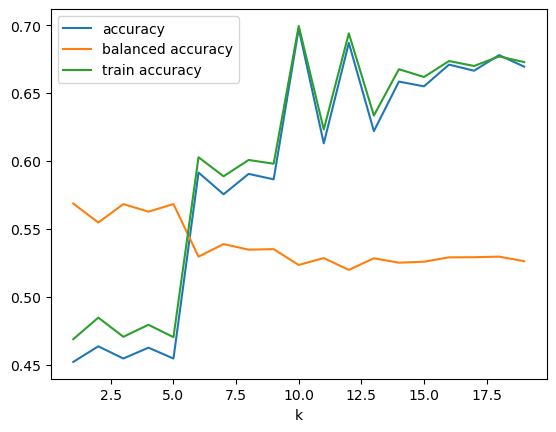

In [78]:
# Plot the elbow curve
df_elbow.set_index("k", inplace=True)
df_elbow.plot.line()